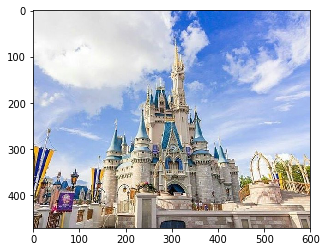

In [27]:
import cv2 #importOpenCV
from matplotlib import pyplot as plt #import mathplotlib
import numpy as np

pic = cv2.imread('pic.jpg')
picRGB = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
plt.imshow(picRGB)


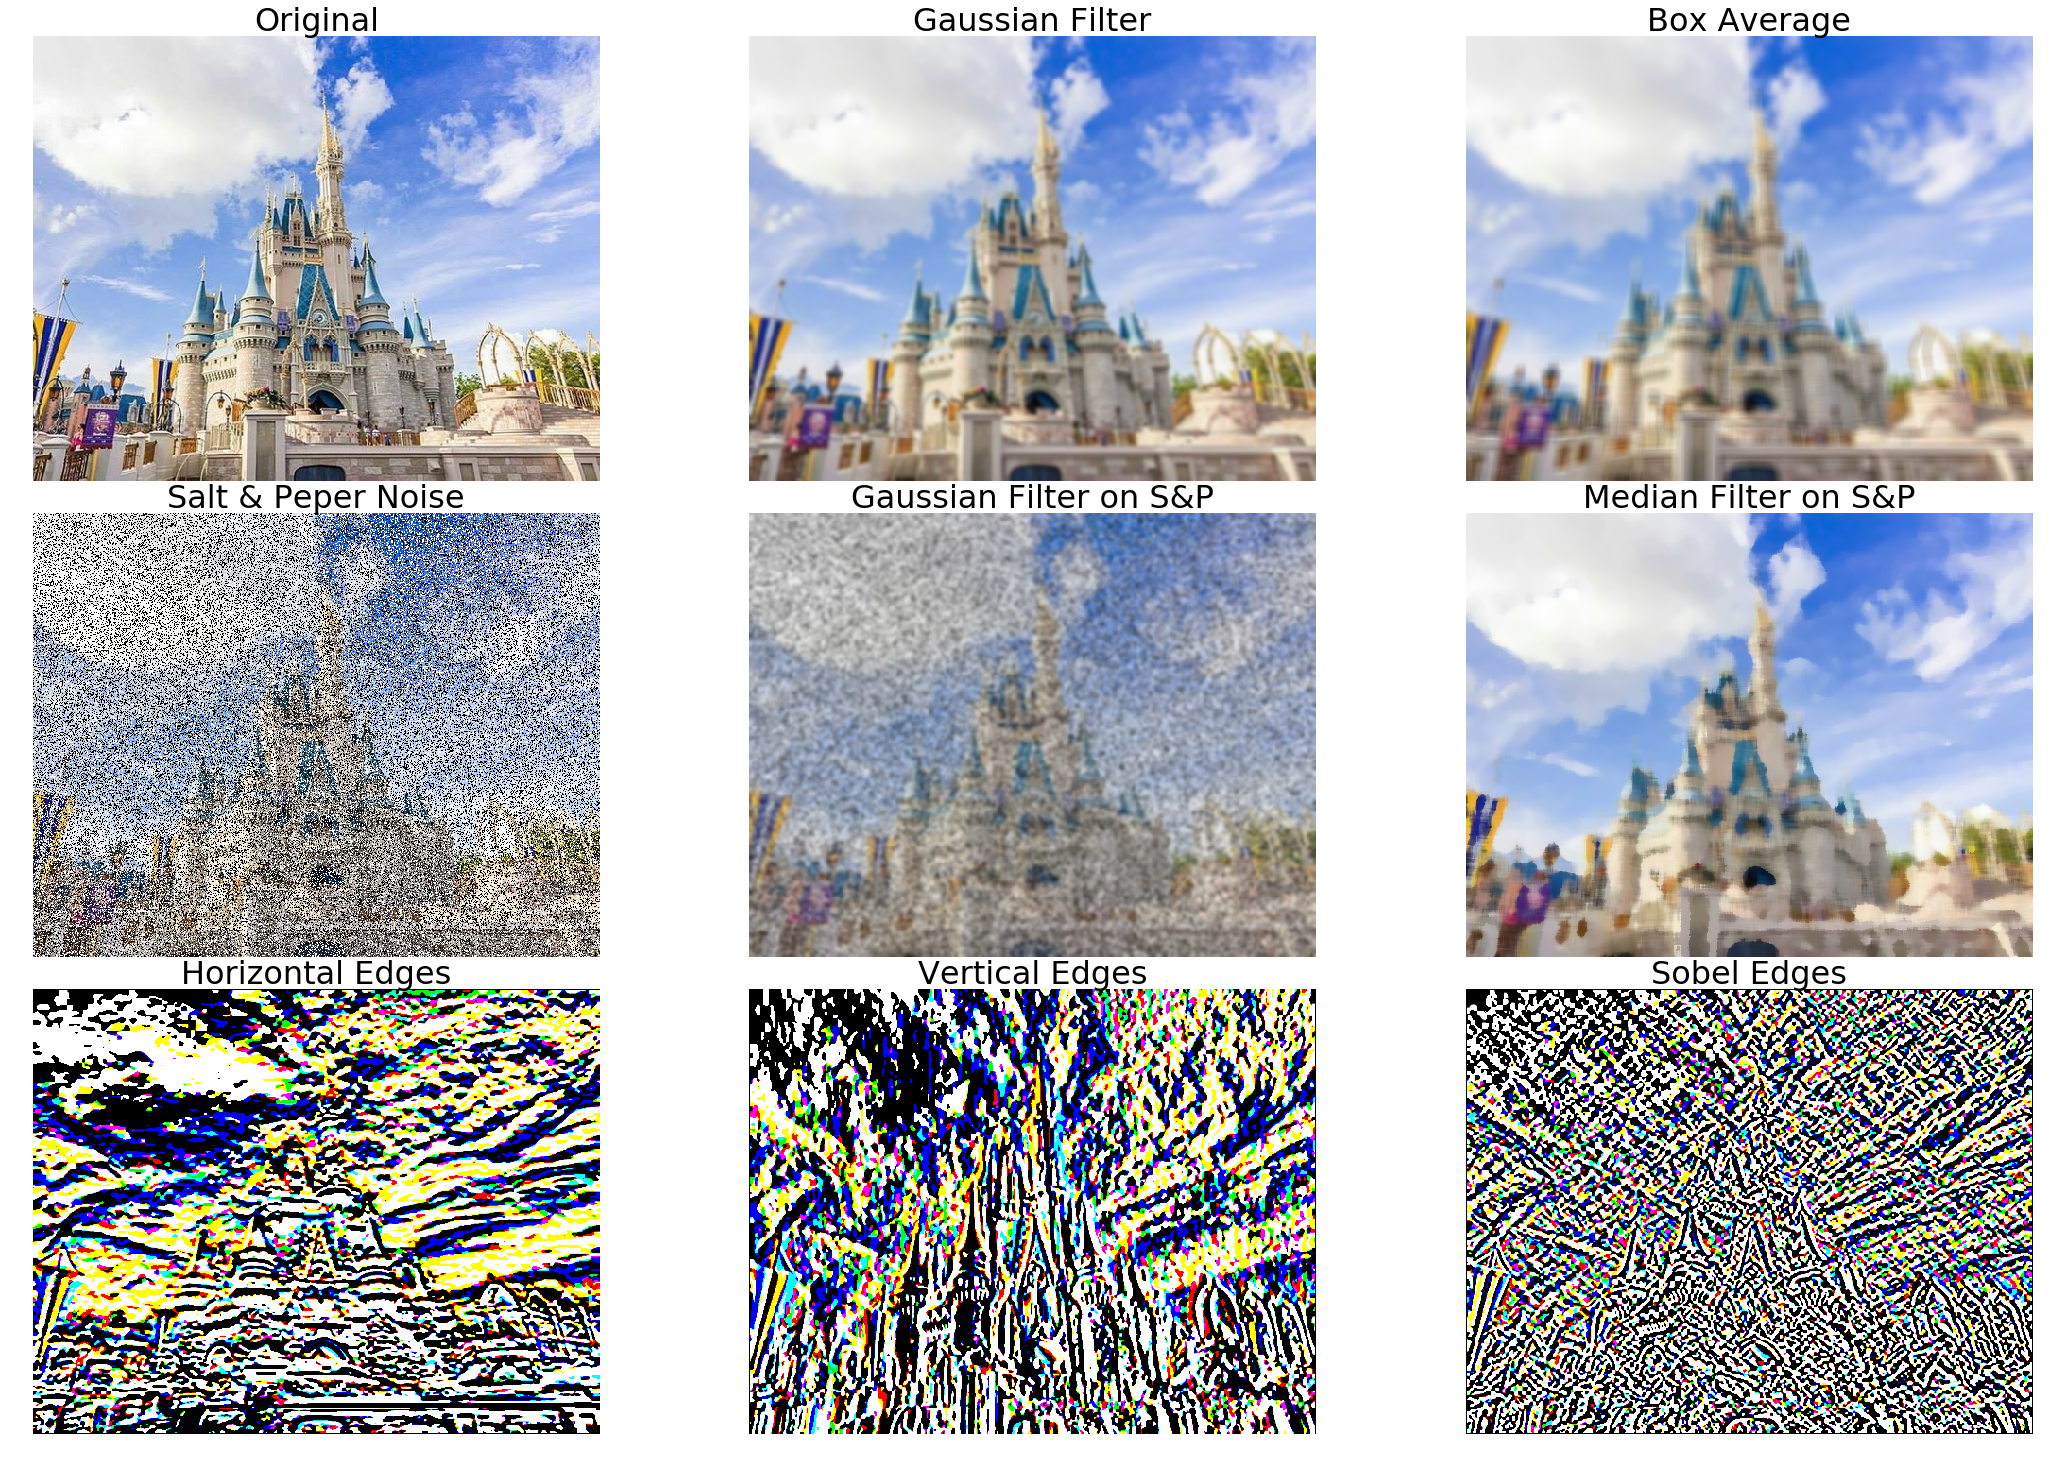

In [37]:

def saltpepper_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

sz = 11

BlurGauss = cv2.GaussianBlur(picRGB, (sz,sz), 0)
BlurBox = cv2.boxFilter(picRGB, -1, (sz,sz))
S_P = saltpepper_noise(picRGB,0.25)
BlurGauss_S_P = cv2.GaussianBlur(S_P, (sz,sz), 0)
medianFiltered = cv2.medianBlur(S_P,sz)
sobeledgeH = cv2.Sobel(picRGB, -1, 0, 1, ksize=sz)   #horizontal edges, changes in the y direction
sobeledgeV = cv2.Sobel(picRGB, -1, 1, 0, ksize=sz)   #vertical edges, changes in the x direction
sobeledge = cv2.Sobel(picRGB, -1, 1, 1, ksize=sz) 

fig, axes= plt.subplots(3,3,figsize=(30,20))
plt.tight_layout()


axes[0,0].imshow(picRGB)
axes[0,0].set_title("Original",fontsize=32)
axes[0,0].axis('off')

axes[0,1].imshow(BlurGauss)
axes[0,1].set_title("Gaussian Filter",fontsize=32)
axes[0,1].axis('off')

axes[0,2].imshow(BlurBox)
axes[0,2].set_title("Box Average",fontsize=32)
axes[0,2].axis('off')

axes[1,0].imshow(S_P)
axes[1,0].set_title("Salt & Peper Noise",fontsize=32)
axes[1,0].axis('off')

axes[1,1].imshow(BlurGauss_S_P)
axes[1,1].set_title("Gaussian Filter on S&P",fontsize=32)
axes[1,1].axis('off')

axes[1,2].imshow(medianFiltered)
axes[1,2].set_title("Median Filter on S&P",fontsize=32)
axes[1,2].axis('off')

axes[2,0].imshow(sobeledgeH)
axes[2,0].set_title("Horizontal Edges",fontsize=32)
axes[2,0].axis('off')

axes[2,1].imshow(sobeledgeV)
axes[2,1].set_title("Vertical Edges",fontsize=32)
axes[2,1].axis('off')


axes[2,2].imshow(sobeledge)
axes[2,2].set_title("Sobel Edges",fontsize=32)
axes[2,2].axis('off')

fig.savefig("Lab4Ex1.jpg", bbox_inches='tight')